In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 6]

In [31]:
e1 = np.array([1.,0.])
e2 = np.array([0.,1.])
o = np.array([0.,0.])

r_vecs = np.array([[o],[o],[o]])

In [66]:
def rot(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
def plot_line(r1,r2,**kwargs):
    return plt.plot(*np.array([r1,r2]).transpose(),**kwargs)[0] 
def arrow(r1,r2):
    val = plot_line(r1,r2)
    plot_line(r2,r2+rot(np.pi/4) @ ((r1-r2)/10),c=val.get_color())
    plot_line(r2,r2+rot(-np.pi/4) @ ((r1-r2)/10),c=val.get_color())
def circle(pos,radius,**kwargs):
    angles = np.linspace(0,2*np.pi)
    return plt.plot(pos[0] + radius * np.cos(angles), pos[1] + radius * np.sin(angles),**kwargs)[0]
def wall(w1, w2, thickness):
    w12 = w2 - w1
    w12 /= w12 @ w12
    n12 = np.array([[0,-1],[1,0]]) @ w12
    n12 /= np.sqrt(n12 @ n12)
    val = plot_line(w1-n12 * thickness,w1+n12 * thickness)
    plot_line(w2-n12 * thickness,w2+n12 * thickness,c=val.get_color())
    plot_line(w2-n12 * thickness,w1-n12 * thickness,c=val.get_color())
    plot_line(w2+n12 * thickness,w1+n12 * thickness,c=val.get_color())

In [67]:
wall_starts = np.array([e1,e1,-e1,-e1])
wall_ends = np.array([e2,-e2,e2,-e2])

wall_midpoints = (wall_starts + wall_ends)/2

wall_diffs = wall_ends - wall_starts
wall_lengths = np.apply_along_axis(np.linalg.norm,1,wall_diffs)
fraction_along_wall_vec = (wall_diffs.transpose() / wall_lengths**2).transpose()
rot90_arr = np.array([[0,-1],[1,0]])
distance_from_wall_vec = (wall_diffs.transpose() / wall_lengths).transpose() @ rot90_arr
print(rot90_arr.shape,wall_diffs.shape,wall_lengths.shape,(wall_diffs.transpose() / wall_lengths).transpose().shape)

distance_from_wall_vec

(2, 2) (4, 2) (4,) (4, 2)


array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678],
       [-0.70710678, -0.70710678]])

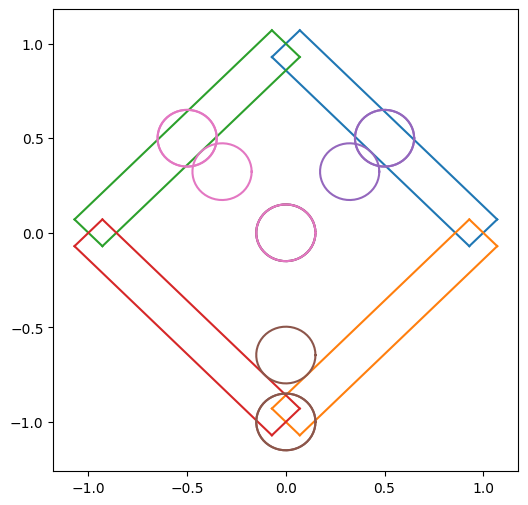

In [134]:
wall_thickness = 0.1
particle_radius = 0.15

for start,end in zip(wall_starts,wall_ends):
    wall(start,end,wall_thickness)

dist = 0.5

delta = np.array([[[dist,dist]],[[0.,-1.]],[[-dist,dist]]])


is_within_wall_parallel = np.abs(np.sum((r_vecs + delta - wall_midpoints) * fraction_along_wall_vec,axis=2)) < 0.5
r_dot_normal_wall = np.sum((r_vecs - wall_midpoints) * distance_from_wall_vec,axis=2)
dr_dot_normal_wall = np.sum(delta * distance_from_wall_vec, axis=2)
distances_from_walls = r_dot_normal_wall + dr_dot_normal_wall
is_close_to_wall_normal = np.abs(distances_from_walls) < wall_thickness + particle_radius
hits_walls = is_within_wall_parallel & is_close_to_wall_normal
# print(np.sum(np.expand_dims(hits_walls,axis=2) * delta * distance_from_wall_vec,axis=2) - hits_walls * distances_from_walls)

# wall_correction = np.sign(r_dot_normal_wall) * (np.abs(distances_from_walls)-(wall_thickness + particle_radius))
# wall_correction = np.expand_dims(wall_correction * hits_walls,2) * distance_from_wall_vec


wall_correction = np.sign(dr_dot_normal_wall) * (np.abs(distances_from_walls)-(wall_thickness + particle_radius))
wall_correction = np.expand_dims(wall_correction * hits_walls,2) * distance_from_wall_vec
wall_correction = np.expand_dims(np.sum(wall_correction,axis=1),1)

for r,dr,corr in zip(r_vecs.squeeze(),delta.squeeze(),wall_correction.squeeze()):
    val = circle(r,particle_radius)
    circle(r+dr,particle_radius,c=val.get_color())
    circle(r+dr,particle_radius,c=val.get_color())
    circle(r+dr+corr,particle_radius,c=val.get_color())

In [ ]:
np.array([[[1.,0.],[0.,1.]]]).shape

(1, 2, 2)